[*********************100%***********************]  1 of 1 completed


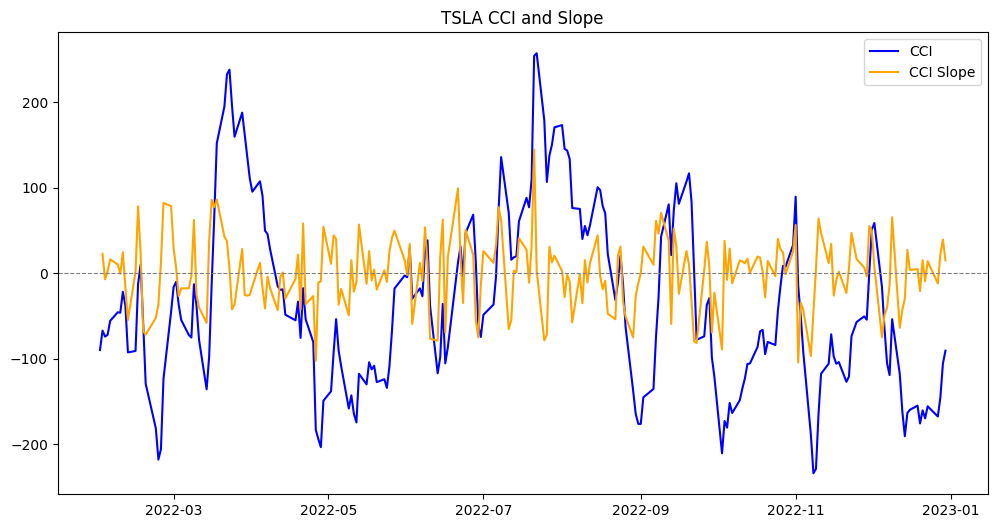

Price                             CCI  CCI_Slope
Ticker                                          
Date                                            
2022-12-23 00:00:00+00:00 -155.539400  14.084366
2022-12-27 00:00:00+00:00 -167.500385 -11.960984
2022-12-28 00:00:00+00:00 -145.027197  22.473188
2022-12-29 00:00:00+00:00 -105.657417  39.369780
2022-12-30 00:00:00+00:00  -90.563157  15.094260


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. TSLA 데이터 가져오기
ticker = "TSLA"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3  # Typical Price

# 2. CCI 계산
n = 20  # CCI 기간
data['SMA_TP'] = data['TP'].rolling(window=n).mean()
data['MAD'] = data['TP'].rolling(window=n).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
data['CCI'] = (data['TP'] - data['SMA_TP']) / (0.015 * data['MAD'])

# 3. CCI의 기울기 계산
data['CCI_Slope'] = data['CCI'].diff()

# 4. 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CCI'], label='CCI', color='blue')
plt.plot(data.index, data['CCI_Slope'], label='CCI Slope', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('TSLA CCI and Slope')
plt.legend()
plt.show()

# 5. 결과 출력
print(data[['CCI', 'CCI_Slope']].tail())


[*********************100%***********************]  1 of 1 completed


Transition Probability Table for All States:
    Current_State Next_State  Count  Probability
0          -1_102     17_131      1          1.0
1          -1_106     38_141      1          1.0
2           -1_55     13_118      1          1.0
3           -1_77     -1_102      1          1.0
4           -1_81     -1_106      1          1.0
..            ...        ...    ...          ...
228        98_107      97_98      1          1.0
229        98_116    137_138      1          1.0
230         98_82    123_125      1          1.0
231          9_73      -1_81      1          1.0
232          9_96     24_114      1          1.0

[233 rows x 4 columns]


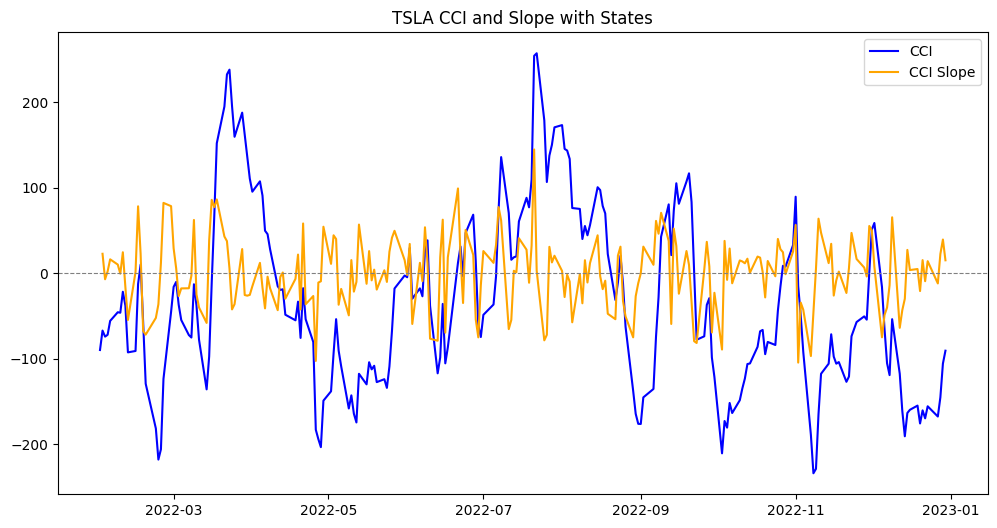

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. TSLA 데이터 가져오기
ticker = "TSLA"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3  # Typical Price

# 2. CCI 계산
n = 20  # CCI 기간
data['SMA_TP'] = data['TP'].rolling(window=n).mean()
data['MAD'] = data['TP'].rolling(window=n).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
data['CCI'] = (data['TP'] - data['SMA_TP']) / (0.015 * data['MAD'])

# 3. CCI의 기울기 계산
data['CCI_Slope'] = data['CCI'].diff()

# 4. 범위 설정
cci_bins = np.arange(-200, 205, 2)  # CCI 범위
slope_bins = np.arange(-200, 205, 2)  # 기울기 범위

# 5. CCI와 기울기를 범위에 따라 상태로 매핑
data['CCI_State'] = np.digitize(data['CCI'], cci_bins) - 1  # -1은 0부터 시작하도록 조정
data['Slope_State'] = np.digitize(data['CCI_Slope'], slope_bins) - 1

# 6. 상태 결합
data['State'] = data['CCI_State'].astype(str) + "_" + data['Slope_State'].astype(str)

# 7. 다음 상태로 전이 추가
data['Next_State'] = data['State'].shift(-1)

# 8. 모든 상태의 전이 확률 계산
# Count occurrences of transitions for all states
all_states_counts = data.groupby(['State', 'Next_State']).size().reset_index(name='Count')

# Calculate probabilities for all states
all_states_counts['Probability'] = (
    all_states_counts.groupby('State')['Count']
    .transform(lambda x: x / x.sum())
)

# Rename columns for clarity
all_states_table = all_states_counts.rename(columns={'State': 'Current_State', 'Next_State': 'Next_State'})

# 9. 결과 출력
print("Transition Probability Table for All States:")
print(all_states_table)

# 10. CSV 파일로 저장 (필요하면 활성화)
all_states_table.to_csv("transition_probability_table.csv", index=False)

# Optional: 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CCI'], label='CCI', color='blue')
plt.plot(data.index, data['CCI_Slope'], label='CCI Slope', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('TSLA CCI and Slope with States')
plt.legend()
plt.show()


In [ ]:
# Filter rows where the count is 5 or more
filtered_table = all_states_table[all_states_table['Count'] >= 2]

# Display the filtered table
print("Filtered Transition Probability Table (Count >= 5):")
print(filtered_table)

# Save the filtered table to a CSV file (optional)
filtered_table.to_csv("filtered_transition_probability_table.csv", index=False)

Filtered Transition Probability Table (Count >= 5):
   Current_State Next_State  Count  Probability
96       202_202    202_202     18     0.947368


In [ ]:
import numpy as np

# 전이 확률 행렬 정의
P = np.array([
    [0.6, 0.3, 0.1],  # 상태 1에서 상태 1, 2, 3으로 전이 확률
    [0.2, 0.5, 0.3],  # 상태 2에서 상태 1, 2, 3으로 전이 확률
    [0.1, 0.3, 0.6]   # 상태 3에서 상태 1, 2, 3으로 전이 확률
])

# 초기 상태 벡터 정의 (현재 상태는 1)
initial_state = np.array([1, 0, 0])

# 5스텝 이후 상태 분포 예측
n_steps = 5
future_state = np.linalg.matrix_power(P, n_steps) @ initial_state

print("5스텝 이후 상태 분포:", future_state)


5스텝 이후 상태 분포: [0.29379 0.27285 0.26254]


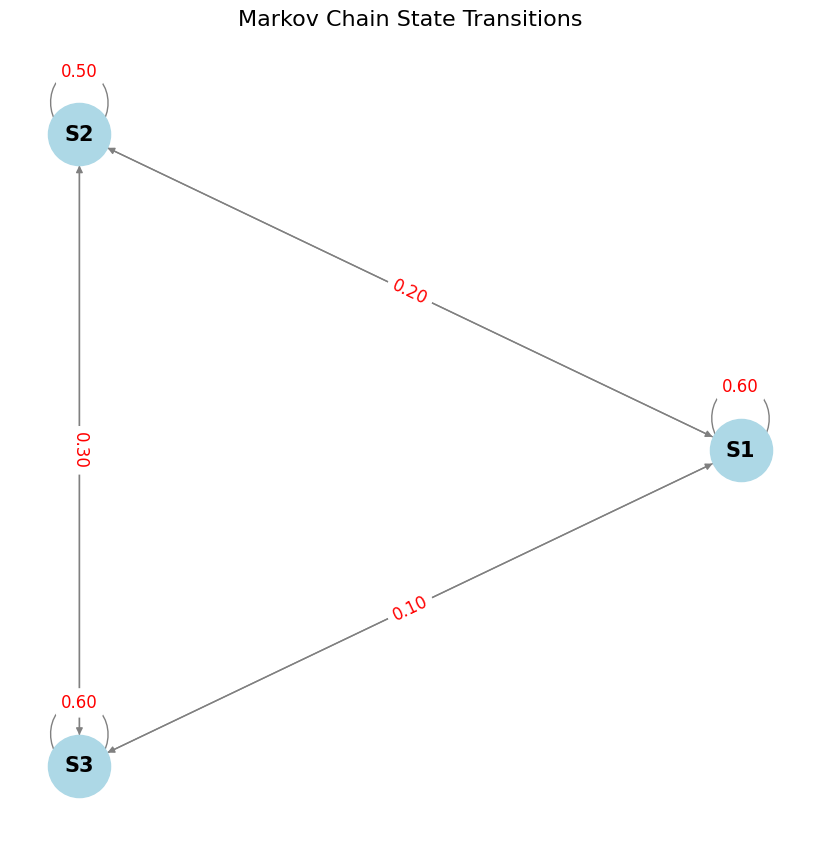

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the transition probability matrix
P = np.array([
    [0.6, 0.3, 0.1],  # State 1 to States 1, 2, 3
    [0.2, 0.5, 0.3],  # State 2 to States 1, 2, 3
    [0.1, 0.3, 0.6]   # State 3 to States 1, 2, 3
])

# Labels for states
states = ['S1', 'S2', 'S3']

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (probabilities)
for i in range(len(P)):
    for j in range(len(P[i])):
        if P[i, j] > 0:  # Only include transitions with non-zero probability
            G.add_edge(states[i], states[j], weight=P[i, j])

# Draw the graph
pos = nx.circular_layout(G)  # Circular layout for better visualization
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')

# Add edge labels (transition probabilities)
edge_labels = {(states[i], states[j]): f'{P[i, j]:.2f}' for i in range(len(P)) for j in range(len(P[i])) if P[i, j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color='red')

plt.title("Markov Chain State Transitions", fontsize=16)
plt.show()


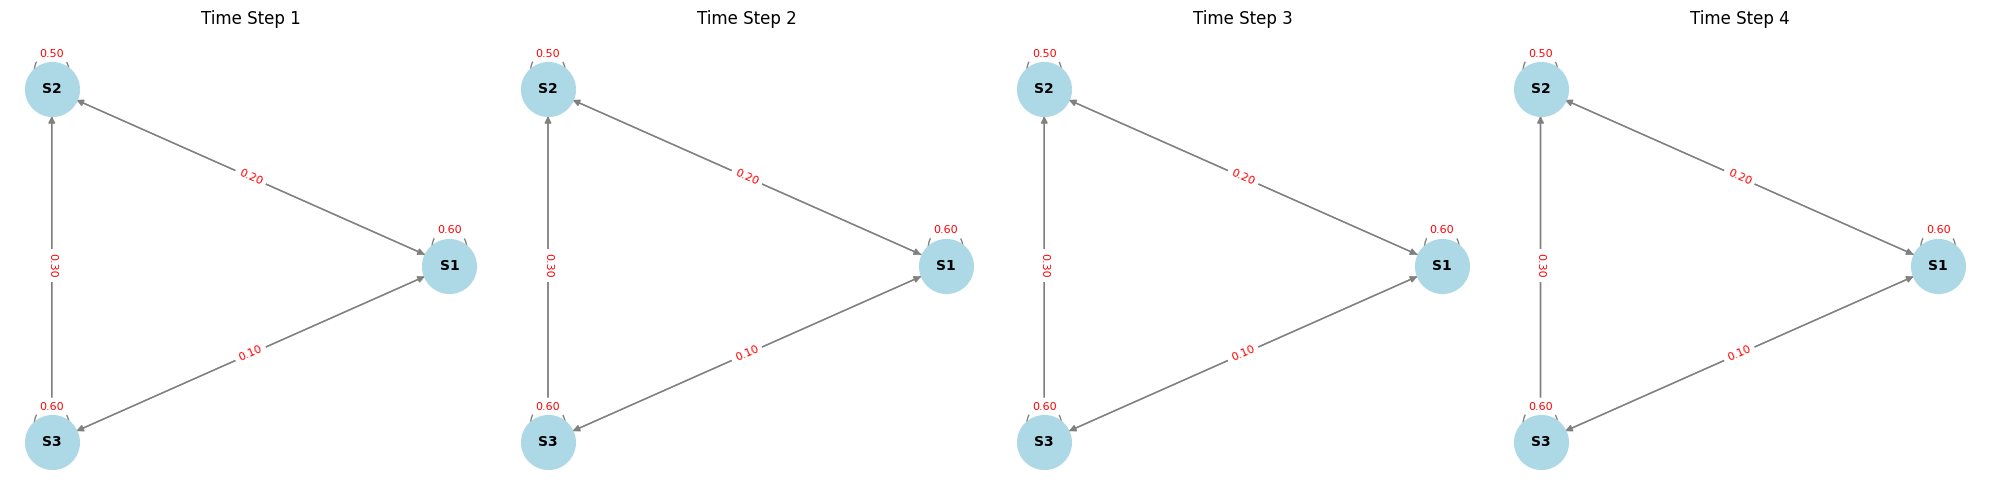

In [ ]:
# Extend the dimension to show transitions over 4 steps
steps = 4
state_history = [np.array([1, 0, 0])]  # Initial state (S1 with probability 1)

# Compute state distributions over time
for t in range(1, steps):
    next_state = state_history[-1] @ P
    state_history.append(next_state)

# Convert states into readable labels for visualization
state_labels = [[f'{s}: {prob:.2f}' for s, prob in zip(states, state)] for state in state_history]

# Create a figure for visualization
fig, axes = plt.subplots(1, steps, figsize=(20, 5))

for t in range(steps):
    # Create a directed graph for each time step
    G = nx.DiGraph()
    current_state = state_history[t]

    # Add nodes with probabilities as labels
    for i, prob in enumerate(current_state):
        G.add_node(states[i], label=f'{states[i]}: {prob:.2f}')

    # Add edges
    for i in range(len(P)):
        for j in range(len(P[i])):
            if P[i, j] > 0:
                G.add_edge(states[i], states[j], weight=P[i, j])

    # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(
        G, pos, ax=axes[t], with_labels=True, node_color='lightblue',
        node_size=1500, font_size=10, font_weight='bold', edge_color='gray'
    )

    # Add edge labels (transition probabilities)
    edge_labels = {(states[i], states[j]): f'{P[i, j]:.2f}' for i in range(len(P)) for j in range(len(P[i])) if P[i, j] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=axes[t], font_size=8, font_color='red')

    # Title for each subplot
    axes[t].set_title(f'Time Step {t + 1}')

plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

# 1. TSLA 데이터 가져오기
ticker = "TSLA"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3  # Typical Price

# 2. CCI 계산
n = 20  # CCI 기간
data['SMA_TP'] = data['TP'].rolling(window=n).mean()
data['MAD'] = data['TP'].rolling(window=n).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
data['CCI'] = (data['TP'] - data['SMA_TP']) / (0.015 * data['MAD'])

# 3. CCI의 기울기 계산
data['CCI_Slope'] = data['CCI'].diff()

# 4. 범위 설정
cci_bins = np.arange(-200, 205, 2)  # CCI 범위
slope_bins = np.arange(-200, 205, 2)  # 기울기 범위

# 5. CCI와 기울기를 범위에 따라 상태로 매핑
data['CCI_State'] = np.digitize(data['CCI'], cci_bins) - 1  # -1은 0부터 시작하도록 조정
data['Slope_State'] = np.digitize(data['CCI_Slope'], slope_bins) - 1

# 6. 상태 결합
data['State'] = data['CCI_State'].astype(str) + "_" + data['Slope_State'].astype(str)

# 7. 다음 상태로 전이 추가
data['Next_State'] = data['State'].shift(-1)

# 8. 모든 상태의 전이 확률 계산
# Count occurrences of transitions for all states
all_states_counts = data.groupby(['State', 'Next_State']).size().reset_index(name='Count')

# 8.1 가능한 모든 상태 쌍 만들기
cci_states = range(len(cci_bins))
slope_states = range(len(slope_bins))
all_combinations = list(itertools.product(cci_states, slope_states))
all_states = [f"{cci}_{slope}" for cci, slope in all_combinations]

# 8.2 가능한 모든 상태 전이 쌍 생성
all_possible_transitions = list(itertools.product(all_states, all_states))
all_possible_transitions_df = pd.DataFrame(all_possible_transitions, columns=['State', 'Next_State'])

# 8.3 기존 데이터와 병합하여 누락된 상태 쌍 추가
all_states_counts = pd.merge(all_possible_transitions_df, all_states_counts, how='left', on=['State', 'Next_State'])
all_states_counts['Count'] = all_states_counts['Count'].fillna(0)

# 8.4 전이 확률 계산
all_states_counts['Probability'] = (
    all_states_counts.groupby('State')['Count']
    .transform(lambda x: x / x.sum())
)

# Rename columns for clarity
all_states_table = all_states_counts.rename(columns={'State': 'Current_State', 'Next_State': 'Next_State'})

# 9. 결과 출력
print("Transition Probability Table for All States:")
print(all_states_table)

# 10. CSV 파일로 저장 (필요하면 활성화)
all_states_table.to_csv("transition_probability_table_complete.csv", index=False)

# Optional: 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CCI'], label='CCI', color='blue')
plt.plot(data.index, data['CCI_Slope'], label='CCI Slope', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('TSLA CCI and Slope with States')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

# 1. TSLA 데이터 가져오기
ticker = "TSLA"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3  # Typical Price

# 2. CCI 계산
n = 20  # CCI 기간
data['SMA_TP'] = data['TP'].rolling(window=n).mean()
data['MAD'] = data['TP'].rolling(window=n).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
data['CCI'] = (data['TP'] - data['SMA_TP']) / (0.015 * data['MAD'])

# 3. CCI의 기울기 계산
data['CCI_Slope'] = data['CCI'].diff()

# 4. 범위 설정
cci_bins = np.arange(-200, 205, 5)  # CCI 범위
slope_bins = np.arange(-200, 205, 5)  # 기울기 범위

# 8. 가능한 모든 상태 쌍 만들기
cci_states = range(len(cci_bins))
slope_states = range(len(slope_bins))
all_combinations = list(itertools.product(cci_states, slope_states))
all_states = [f"{cci}_{slope}" for cci, slope in all_combinations]

# 8.1 가능한 모든 상태 전이 쌍 생성
all_possible_transitions = list(itertools.product(all_states, all_states))

all_possible_transitions_df = pd.DataFrame(all_possible_transitions, columns=['State', 'Next_State'])
all_possible_transitions_df['count'] = 0

[*********************100%***********************]  1 of 1 completed


In [ ]:
# 1. 각 CCI 및 Slope에 대해 상태 라벨링
def label_state(value, bins):
    return np.digitize(value, bins, right=True) - 1  # 범위에 따라 상태 부여

data['CCI_State'] = data['CCI'].apply(lambda x: label_state(x, cci_bins))
data['Slope_State'] = data['CCI_Slope'].apply(lambda x: label_state(x, slope_bins))

# 2. 현재 상태와 다음 상태 계산
data['State'] = data['CCI_State'].astype(str) + "_" + data['Slope_State'].astype(str)
data['Next_State'] = data['State'].shift(-1)

# 3. 상태 전이 쌍별 count 계산
transition_counts = data.groupby(['State', 'Next_State']).size().reset_index(name='count')

# 4. 모든 가능한 전이 쌍과 합치기
all_possible_transitions_df = pd.merge(
    all_possible_transitions_df,
    transition_counts,
    on=['State', 'Next_State'],
    how='left'
)

# NaN을 0으로 채우기 (전이 없는 쌍)
all_possible_transitions_df['count'] = all_possible_transitions_df['count'].fillna(0).astype(int)

# 결과 출력
import ace_tools as tools; tools.display_dataframe_to_user(name="State Transition Counts", dataframe=all_possible_transitions_df)


In [ ]:
# 5. Volume SMA 계산
volume_n = 20  # Volume SMA 기간
data['Volume_SMA'] = data['Volume'].rolling(window=volume_n).mean()

# 6. Volume 범위 설정
volume_bins = np.linspace(data['Volume_SMA'].min(), data['Volume_SMA'].max(), 20)  # 20개 구간

# 7. Volume 상태 정의
data['Volume_State'] = pd.cut(data['Volume_SMA'], bins=volume_bins, labels=range(len(volume_bins) - 1))

# 8. CCI와 Slope 상태 정의
data['CCI_State'] = pd.cut(data['CCI'], bins=cci_bins, labels=range(len(cci_bins) - 1))
data['Slope_State'] = pd.cut(data['CCI_Slope'], bins=slope_bins, labels=range(len(slope_bins) - 1))

# 9. 상태 조합 생성
data['State'] = data['CCI_State'].astype(str) + "_" + data['Slope_State'].astype(str) + "_" + data['Volume_State'].astype(str)

# 10. 모든 가능한 상태 조합 생성
volume_states = range(len(volume_bins) - 1)  # Volume 상태의 범위
all_combinations = list(itertools.product(cci_states, slope_states, volume_states))
all_states = [f"{cci}_{slope}_{volume}" for cci, slope, volume in all_combinations]

# 11. 가능한 모든 상태 전이 쌍 생성
all_possible_transitions = list(itertools.product(all_states, all_states))

# 결과 출력
all_possible_transitions[:10]  # 가능한 전이 중 일부 샘플 출력


NameError: name 'data' is not defined